<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_HW2_Minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1310]:
#Problem 1

#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalerminmax = MinMaxScaler()
scalerstand = StandardScaler()

#Importing File from MyDrive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4105 Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
#housing.head()
housing.shape
#housing.isnull().sum()*100/housing.shape[0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(545, 13)

Getting the data from google drive

In [1311]:
#mapping the variables to a binary output
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [1312]:
#Splitting into training and validation
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [1313]:
#Splitting Variables
train_y_value = df_train["price"]
val_y_value = df_test["price"]


#Setting up variables
m_train = len(train_y_value) #Number of Samples in set
m_val = len(val_y_value) #Number of Samples in set
learning_rate = 0.000000001
iterations = 100
theta_a = np.zeros(6)
theta_b = np.zeros(12)

#Part A
var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a_train = np.c_[np.ones((m_train, 1)), df_train[var_a]]
X_a_val = np.c_[np.ones((m_val, 1)), df_test[var_a]]

#Part B
var_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_b_train = np.c_[np.ones((m_train, 1)), df_train[var_b]]
X_b_val = np.c_[np.ones((m_val, 1)), df_test[var_b]]

train_losses_a = []
val_losses_a = []
train_losses_b = []
val_losses_b = []
#df_train.head()

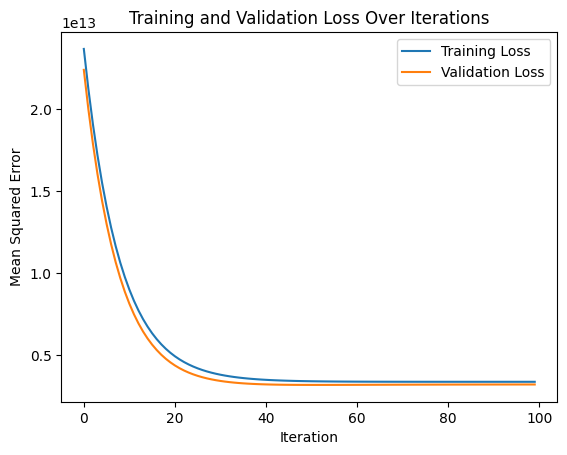

In [1314]:
#Loss of Part A

for iteration in range(iterations):
    gradients = 2/m_train * X_a_train.T.dot(X_a_train.dot(theta_a) - train_y_value)
    theta_a -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_a_train.dot(theta_a) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_a_val.dot(theta_a) - val_y_value))

    train_losses_a.append(train_loss)
    val_losses_a.append(val_loss)

plt.plot(train_losses_a, label="Training Loss")
plt.plot(val_losses_a, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

#df_train.head()

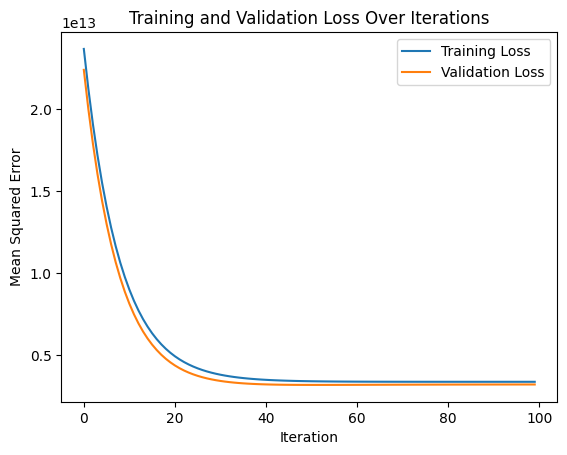

In [1315]:
#Loss for Part B

for iteration in range(iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta_b) - train_y_value)
    theta_b -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta_b) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta_b) - val_y_value))

    train_losses_b.append(train_loss)
    val_losses_b.append(val_loss)

plt.plot(train_losses_b, label="Training Loss")
plt.plot(val_losses_b, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

#df_train.head()

In [1316]:
#Problem 2a) minmaxing the training set

#minmax scaling
df_train_s = df_train
df_train_s[var_a] = scalerminmax.fit_transform(df_train_s[var_a])
df_train_s.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,7840000,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,6419000,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,5950000,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,3010000,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [1317]:
#Problem 2a) minmaxing the validation set

#minmax scaling
df_val_s = df_test
df_val_s[var_a] = scalerminmax.fit_transform(df_val_s[var_a])
df_val_s.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,7350000,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,5250000,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,4550000,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,4382000,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [1318]:
#Problem 2b) minmaxing the training set

#minmax scaling
df_train_s_b = df_train
df_train_s_b[var_b] = scalerminmax.fit_transform(df_train_s_b[var_b])
df_train_s_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,furnished
41,7840000,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,furnished
91,6419000,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,furnished
118,5950000,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,furnished
472,3010000,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,semi-furnished


In [1319]:
#Problem 2b) minmaxing the validation set

#minmax scaling
df_val_s_b = df_test
df_val_s_b[var_b] = scalerminmax.fit_transform(df_val_s_b[var_b])
df_val_s_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,semi-furnished
54,7350000,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,semi-furnished
171,5250000,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,semi-furnished
244,4550000,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,semi-furnished
268,4382000,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,semi-furnished


In [1320]:
#Stacking them inputs for minmax

learning_rate = 0.002
iterations = 1000
theta_a = np.zeros(6)
theta_b = np.zeros(12)

#Part A
var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a_train_s = np.c_[np.ones((m_train, 1)), df_train_s[var_a]]
X_a_val_s = np.c_[np.ones((m_val, 1)), df_val_s[var_a]]
print(X_a_train_s)
#Part B
var_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_b_train_s = np.c_[np.ones((m_train, 1)), df_train_s_b[var_b]]
X_b_val_s = np.c_[np.ones((m_val, 1)), df_val_s_b[var_b]]

train_losses_a_s = []
val_losses_a_s = []
train_losses_b_s = []
val_losses_b_s = []

[[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 ...
 [1.         0.11027569 0.2        0.         0.33333333 0.33333333]
 [1.         0.2898914  0.4        0.33333333 0.66666667 0.        ]
 [1.         0.40824283 0.2        0.         0.         0.        ]]


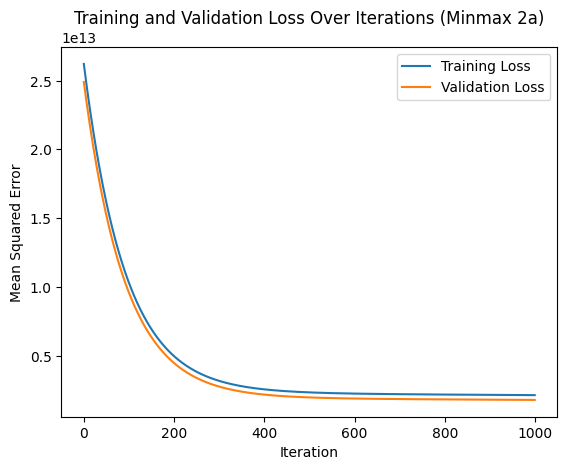

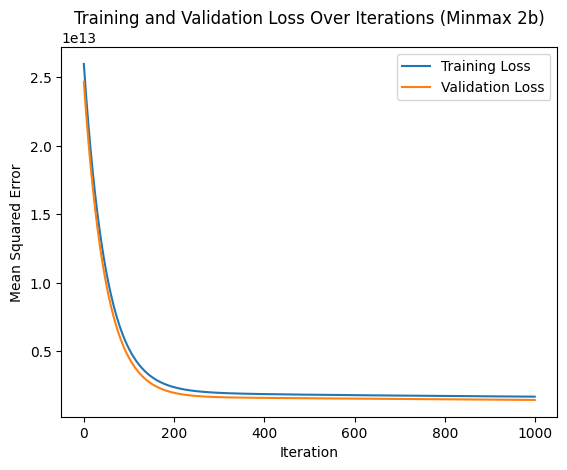

In [1321]:
#Loss of Part 2a using minmax

for iteration in range(iterations):
    gradients = 2/m_train * X_a_train_s.T.dot(X_a_train_s.dot(theta_a) - train_y_value)
    theta_a -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_a_train_s.dot(theta_a) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_a_val_s.dot(theta_a) - val_y_value))

    train_losses_a_s.append(train_loss)
    val_losses_a_s.append(val_loss)

plt.plot(train_losses_a_s, label="Training Loss")
plt.plot(val_losses_a_s, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Minmax 2a)")
plt.show()


#Loss of Part 2b using minmax
for iteration in range(iterations):
    gradients = 2/m_train * X_b_train_s.T.dot(X_b_train_s.dot(theta_b) - train_y_value)
    theta_b -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train_s.dot(theta_b) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val_s.dot(theta_b) - val_y_value))

    train_losses_b_s.append(train_loss)
    val_losses_b_s.append(val_loss)

plt.plot(train_losses_b_s, label="Training Loss")
plt.plot(val_losses_b_s, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Minmax 2b)")
plt.show()

In [1322]:
#Problem 3

def gradient_descent_pen(train,val,y_train,y_test,learning_rate,theta,iterations,penalty_par,input):
  train_losses = []
  val_losses = []

  for iteration in range(iterations):
    penalty = np.square(np.sum(theta))
    gradients = 2/m_train * train.T.dot(train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
  return train_losses, val_losses

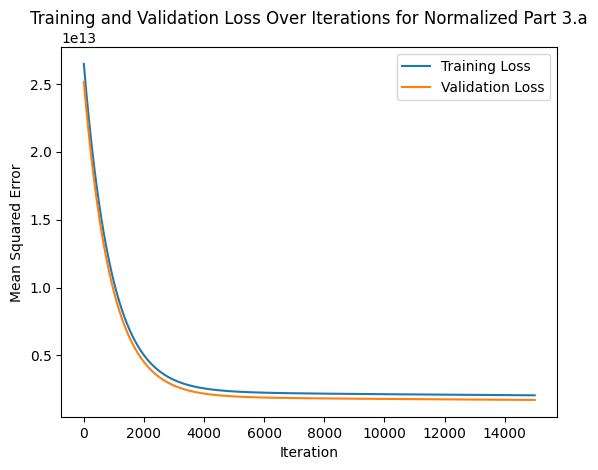

In [1323]:
#Part 3a)
#minmax scaling
df_train_minmax_pen = df_train_s
df_train_minmax_pen[var_a] = scalerminmax.fit_transform(df_train_minmax_pen[var_a])


var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
train_minmax_pen = np.c_[np.ones((m_train, 1)), df_train_minmax_pen[var_a]]



df_val_minmax_pen = df_val_s
df_val_minmax_pen[var_a] = scalerminmax.fit_transform(df_val_minmax_pen[var_a])
val_minmax_pen = np.c_[np.ones((m_val, 1)), df_val_minmax_pen[var_a]]

theta_a = np.zeros(6)

iterations = 15000
learning_rate = 0.0002
inputs = 5
pen_par = 0.000000001

train_losses_3a_pen, val_losses_3a_pen = gradient_descent_pen(train_minmax_pen,val_minmax_pen,train_y_value,val_y_value,learning_rate, theta_a, iterations, pen_par,inputs)

plt.plot(train_losses_3a_pen, label="Training Loss")
plt.plot(val_losses_3a_pen, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()

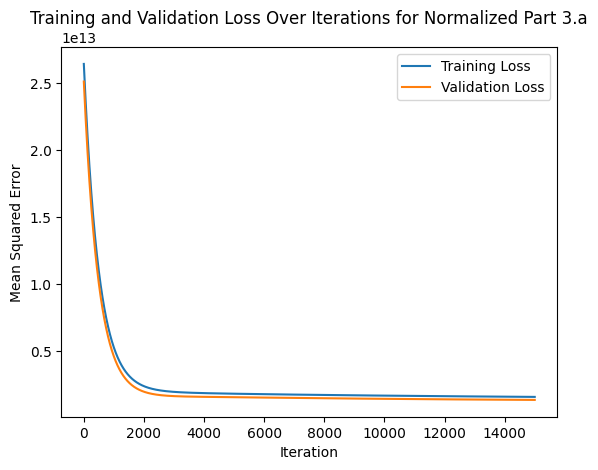

In [1324]:
#Part 3b)
#minmax scaling
df_train_minmax_pen = df_train_s_b
df_train_minmax_pen[var_b] = scalerminmax.fit_transform(df_train_minmax_pen[var_b])

train_minmax_pen = np.c_[np.ones((m_train, 1)), df_train_minmax_pen[var_b]]



df_val_minmax_pen = df_val_s_b
df_val_minmax_pen[var_b] = scalerminmax.fit_transform(df_val_minmax_pen[var_b])
val_minmax_pen = np.c_[np.ones((m_val, 1)), df_val_minmax_pen[var_b]]

theta_b = np.zeros(12)

iterations = 15000
learning_rate = 0.0002
inputs = 5
pen_par = 0.000000001

train_losses_3b_pen, val_losses_3b_pen = gradient_descent_pen(train_minmax_pen,val_minmax_pen,train_y_value,val_y_value,learning_rate, theta_b, iterations, pen_par,inputs)

plt.plot(train_losses_3b_pen, label="Training Loss")
plt.plot(val_losses_3b_pen, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()